# Waste

We generate so much waste

Messing about with the [National Waste Data](https://www.dcceew.gov.au/environment/protection/waste/national-waste-reports/2022)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import os
from datetime import datetime

waste_data = pd.read_excel(r"C:/Users/grace/Desktop/waste_data.xlsx")

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [5]:
filepath = "waste_data.xlsx"
waste_data = pd.read_excel(filepath, sheet_name="Database 2022")

C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [6]:
waste_data.head()

Year Jurisdiction   Category       Type Classification Total type  \
0  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
1  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
2  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
3  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
4  2020-2021          ACT  Biosolids        NaN       Category        NaN   

  Stream      Management       Fate        Tonnes Core or non-core  \
0    C&I  Other disposal   Disposal  20185.549742       Core waste   
1    C&I       Recycling  Recycling      0.000000       Core waste   
2  Total  Other disposal   Disposal  20185.549742       Core waste   
3  Total       Recycling  Recycling      0.000000       Core waste   
4    C&I  Other disposal   Disposal  20185.549742       Core waste   

    Sub-stream   Cat. order Cat. no.    Type order Type no.       
0  03 C&I core  03 Organics       C3  14 Biosolids      T14  NaN  
1  03 C&I core  03 Organics       C3  14 Biosolids      T14  NaN  
2     09 Total  03 Organics       C3  14 Biosolids      T14  NaN  
3     09 Total  03 Organics       C3  14 Biosolids      T14  NaN  
4  03 C&I core  03 Organics       C3           NaN      NaN  NaN

In [7]:
def year_string_to_timesamp(year_string):
    year = int(year_string.split('-')[0])
    return pd.Timestamp(year=year, month=1, day=1, hour=0, minute=0)

waste_data["year_dt"] = waste_data.Year.apply(year_string_to_timesamp)
waste_data.head()

Year Jurisdiction   Category       Type Classification Total type  \
0  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
1  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
2  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
3  2020-2021          ACT  Biosolids  Biosolids           Type        NaN   
4  2020-2021          ACT  Biosolids        NaN       Category        NaN   

  Stream      Management       Fate        Tonnes Core or non-core  \
0    C&I  Other disposal   Disposal  20185.549742       Core waste   
1    C&I       Recycling  Recycling      0.000000       Core waste   
2  Total  Other disposal   Disposal  20185.549742       Core waste   
3  Total       Recycling  Recycling      0.000000       Core waste   
4    C&I  Other disposal   Disposal  20185.549742       Core waste   

    Sub-stream   Cat. order Cat. no.    Type order Type no.         year_dt  
0  03 C&I core  03 Organics       C3  14 Biosolids      T14  NaN 2020-01-01  
1  03 C&I core  03 Organics       C3  14 Biosolids      T14  NaN 2020-01-01  
2     09 Total  03 Organics       C3  14 Biosolids      T14  NaN 2020-01-01  
3     09 Total  03 Organics       C3  14 Biosolids      T14  NaN 2020-01-01  
4  03 C&I core  03 Organics       C3           NaN      NaN  NaN 2020-01-01

In [8]:
waste_data.sample(5)
#gives you a random file code(usually the first data of is an outlier to the rest)

Year Jurisdiction          Category  \
17502  2017-2018          ACT  Hazardous wastes   
1288   2020-2021          NSW  Hazardous wastes   
28683  2015-2016           NT  Hazardous wastes   
55065  2009-2010           NT  Hazardous wastes   
8787   2019-2020          Qld            Metals   

                                             Type Classification Total type  \
17502                Other soil/sludges (other N)           Type        NaN   
1288                                        Other           Type        NaN   
28683  Food-derived hazardous wastes (K100, K110)           Type        NaN   
55065                                         NaN       Category        NaN   
8787                                          NaN       Category        NaN   

      Stream Management             Fate        Tonnes Core or non-core  \
17502    C&D  Treatment  Energy recovery      0.000000       Core waste   
1288     C&I  Treatment  Energy recovery      0.000000       Core waste   
28683    C&I  Treatment         Disposal    527.465111       Core waste   
55065  Total   Landfill         Disposal  11735.586462       Core waste   
8787     MSW  Recycling        Recycling  52853.000000       Core waste   

        Sub-stream           Cat. order Cat. no.  \
17502       02 C&D  09 Hazardous wastes       C9   
1288   03 C&I core  09 Hazardous wastes       C9   
28683  03 C&I core  09 Hazardous wastes       C9   
55065     09 Total  09 Hazardous wastes       C9   
8787        01 MSW            02 Metals       C2   

                                          Type order Type no.         year_dt  
17502                46 Other soil/sludges (other N)      T46  NaN 2017-01-01  
1288                                        50 Other      T50  NaN 2020-01-01  
28683  41 Food-derived hazardous wastes (K100, K110)      T41  NaN 2015-01-01  
55065                                            NaN      NaN  NaN 2009-01-01  
8787                                             NaN      NaN  NaN 2019-01-01

In [9]:
waste_data.columns
#gets the coloumn out - good for changing the name of the coloumn

Index(['Year', 'Jurisdiction', 'Category', 'Type', 'Classification',
       'Total type', 'Stream', 'Management', 'Fate', 'Tonnes',
       'Core or non-core', 'Sub-stream', 'Cat. order', 'Cat. no.',
       'Type order', 'Type no.', ' ', 'year_dt'],
      dtype='object')

In [10]:
row_one = waste_data.iloc[1]
row_one
#index locator - makes data like a list
#Nan = N/A

Year                          2020-2021
Jurisdiction                        ACT
Category                      Biosolids
Type                          Biosolids
Classification                     Type
Total type                          NaN
Stream                              C&I
Management                    Recycling
Fate                          Recycling
Tonnes                              0.0
Core or non-core             Core waste
Sub-stream                  03 C&I core
Cat. order                  03 Organics
Cat. no.                             C3
Type order                 14 Biosolids
Type no.                            T14
                                    NaN
year_dt             2020-01-01 00:00:00
Name: 1, dtype: object

# 🖥️🖥️Setting things up🖥️🖥️

In [11]:
df = pd.DataFrame(waste_data) # filtering out the Total/Australia stuff out of df
condition = ~((waste_data['Classification'] == 'Total') & (waste_data['Classification'] == 'Type'))

filtered_waste_df = df[condition]

In [12]:
filtered_waste_df.sample(5)

Year Jurisdiction          Category  \
53971  2009-2010          ACT          Organics   
21243  2017-2018          Vic  Hazardous wastes   
8075   2019-2020           NT  Hazardous wastes   
33377  2014-2015          NSW            Metals   
14255  2018-2019          Qld  Hazardous wastes   

                                              Type Classification  \
53971                               Other organics           Type   
21243  Other hazardous organic wastes (K140, K190)           Type   
8075                                           NaN          Total   
33377                                          NaN       Category   
14255                                 Tyres (T140)           Type   

           Total type Stream      Management             Fate        Tonnes  \
53971             NaN  Total        Landfill  Energy recovery  3.120000e+02   
21243             NaN    C&D  Other disposal         Disposal  0.000000e+00   
8075   Hazwaste total    C&I       Treatment         Disposal  1.877225e+03   
33377             NaN  Total       Recycling        Recycling  1.643532e+06   
14255             NaN    C&D       Recycling        Recycling  0.000000e+00   

      Core or non-core   Sub-stream           Cat. order Cat. no.  \
53971       Core waste     09 Total          03 Organics       C3   
21243       Core waste       02 C&D  09 Hazardous wastes       C9   
8075        Core waste  03 C&I core  09 Hazardous wastes       C9   
33377       Core waste     09 Total            02 Metals       C2   
14255       Core waste       02 C&D  09 Hazardous wastes       C9   

                                           Type order Type no.         year_dt  
53971                               13 Other organics      T13  NaN 2009-01-01  
21243  42 Other hazardous organic wastes (K140, K190)      T42  NaN 2017-01-01  
8075                                              NaN      NaN  NaN 2019-01-01  
33377                                             NaN      NaN  NaN 2014-01-01  
14255                                 48 Tyres (T140)      T48  NaN 2018-01-01

# 🖥️Filtering data by State

In [13]:
df = pd.DataFrame(filtered_waste_df)

nsw_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'NSW']
wa_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'WA']
vic_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'Vic']
qld_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'Qld']
act_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'ACT']
tas_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'Tas']
nt_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'NT']
sa_data = filtered_waste_df[filtered_waste_df["Jurisdiction"] == 'SA']

# 🔍❓Lookin' at ma DATA (Hmm...)🕵️‍♀️🔍

# ✅Q: What creates the most WASTE? 
TONNES of waste per CATEGORY in AUSTRALIA

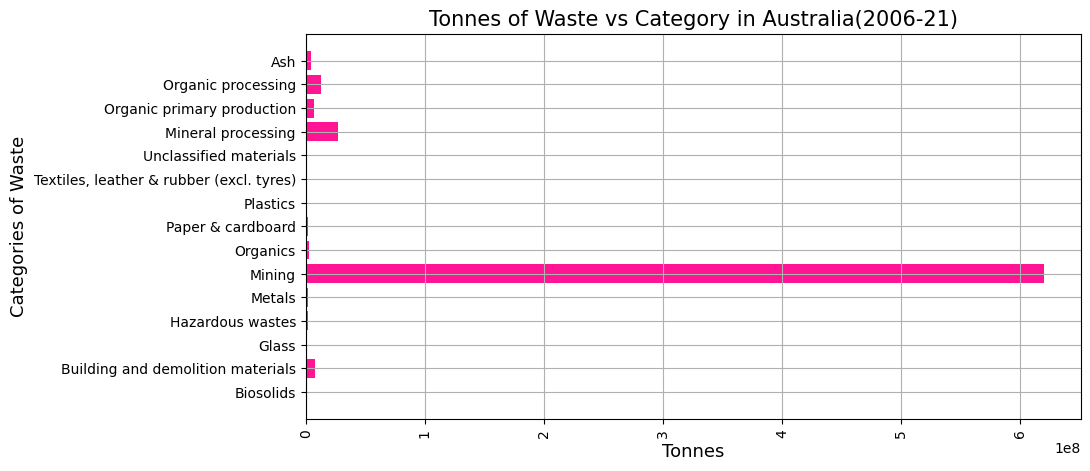

In [14]:
df = pd.DataFrame(waste_data) # filtering out the Total/Australia stuff out of df
condition = ~((waste_data['Category'] == 'Total'))

filtered_waste_df = df[condition]

plt.figure()
plt.barh(filtered_waste_df['Category'], filtered_waste_df['Tonnes'], color='deeppink')

plt.tick_params(axis='x', labelrotation=90)
plt.title("Tonnes of Waste vs Category in Australia(2006-21)", fontsize=15)
plt.xlabel("Tonnes", fontsize=13)
plt.ylabel("Categories of Waste", fontsize=13)
plt.grid(True)
plt.show()

plt.show()

# A: Mining...🫠

# Q: Well then, WHO creates the most WASTE?
TONNES of waste per STATE

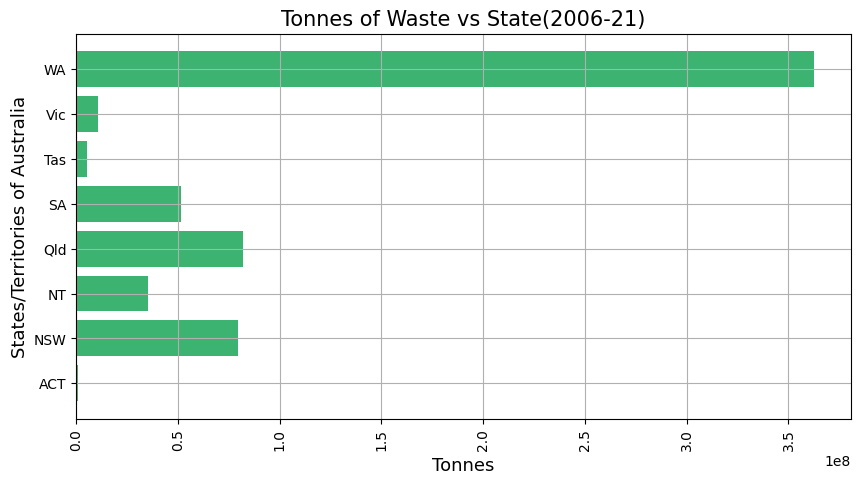

In [15]:
df = pd.DataFrame(waste_data) # filtering out the Total/Australia stuff out of df
condition = ~((waste_data['Jurisdiction'] == 'Australia'))

filtered_waste_df = df[condition]

plt.figure()
plt.barh(filtered_waste_df['Jurisdiction'], filtered_waste_df['Tonnes'], color='mediumseagreen')
plt.tick_params(axis='x', labelrotation=90)

plt.title("Tonnes of Waste vs State(2006-21)", fontsize=15)
plt.xlabel("Tonnes", fontsize=13)
plt.ylabel("States/Territories of Australia", fontsize=13)
plt.grid(True)

plt.show()

# A: WA?!
# Q: WHY do you have so much waste @WA????

#    ✅Represented as a PIE CHART🥧YAY!😎

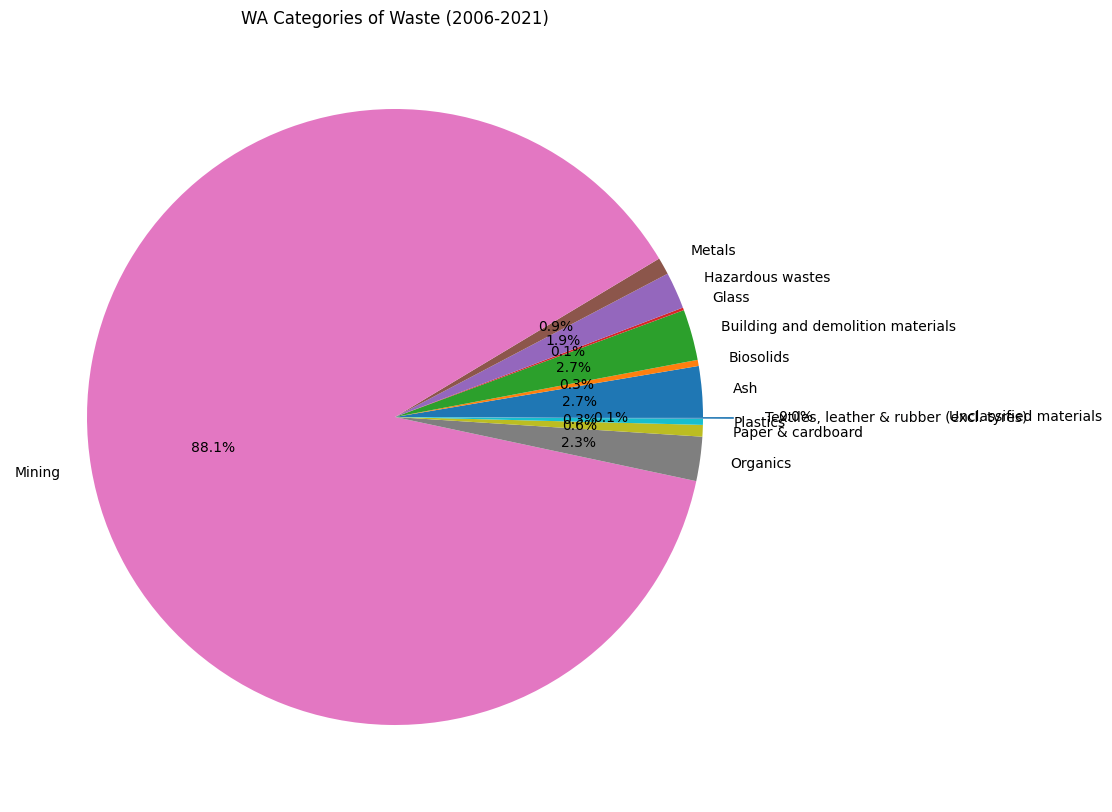

In [16]:
df = pd.DataFrame(wa_data)
condition = ~((wa_data['Category'] == 'Total'))

wa_data = df[condition]

df_positive = wa_data[wa_data['Tonnes'] >= 0]

if df_positive.empty:
    raise ValueError("No non-negative values available for pie chart")

df_grouped = df_positive.groupby('Category', as_index=False)['Tonnes'].sum()


plt.figure(figsize=(10, 10))

wegdes, texts, autotexts = plt.pie(
    df_grouped['Tonnes'],                      # Data for the pie chart
    labels= df_grouped['Category'],
    autopct="%1.1f%%",
    explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.7)
)


plt.title('WA Categories of Waste (2006-2021)')


plt.show()


#  A: Of course... don't we love mining...⛏️😿

.

# Q2: Sweet NSW...what kind of waste do YOU create? 🏡🗑️

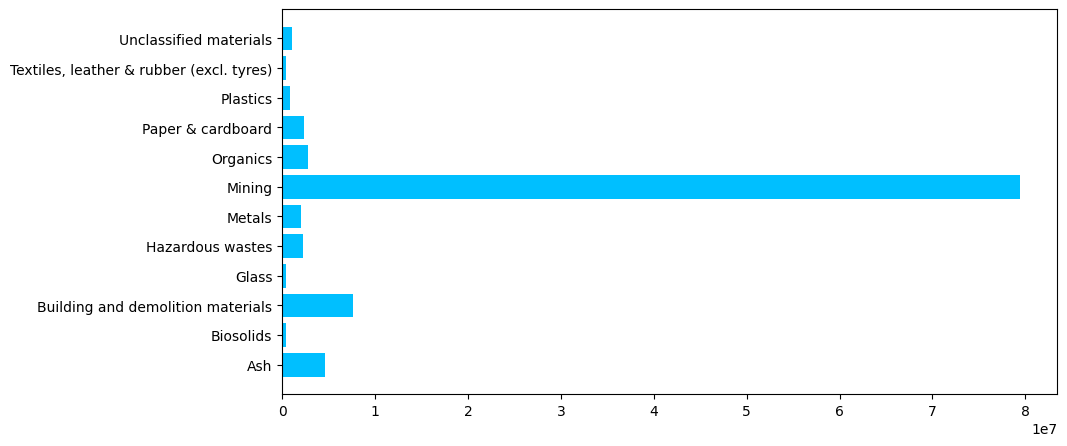

In [17]:
df = pd.DataFrame(nsw_data)
condition = ~((nsw_data['Category'] == 'Total'))

nsw_data = df[condition]
plt.barh(nsw_data["Category"], nsw_data["Tonnes"], color='deepskyblue')

plt.show()

# as a 🥧?

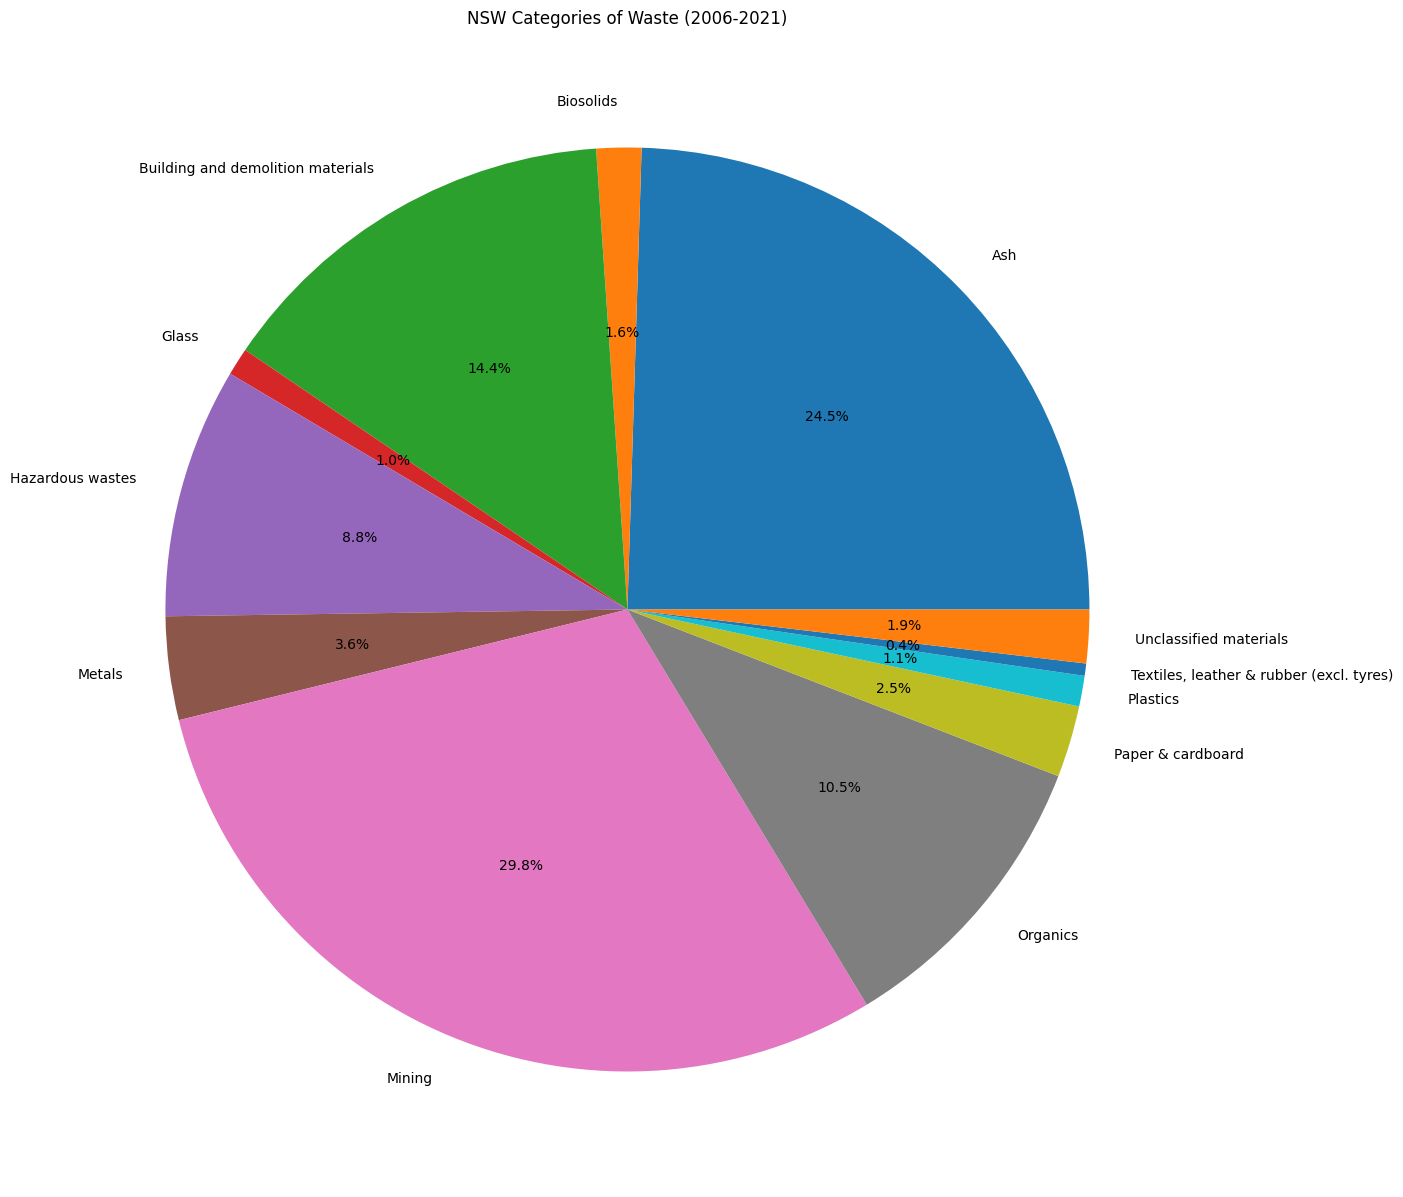

In [18]:
df = pd.DataFrame(nsw_data)
condition = ~((nsw_data['Category'] == 'Total'))

nsw_data = df[condition]

df_positive = nsw_data[nsw_data['Tonnes'] >= 0]

if df_positive.empty:
    raise ValueError("No non-negative values available for pie chart")

df_grouped = df_positive.groupby('Category', as_index=False)['Tonnes'].sum()


plt.figure(figsize=(15, 15))

wegdes, texts, autotexts = plt.pie(
    df_grouped['Tonnes'],                      # Data for the pie chart
    labels= df_grouped['Category'],
    autopct="%1.1f%%",
    )


plt.title('NSW Categories of Waste (2006-2021)')


plt.show()


# A: Mining as well, wonderful. 😿😿

# TONNES of waste per TYPE

TypeError: 'value' must be an instance of str or bytes, not a float

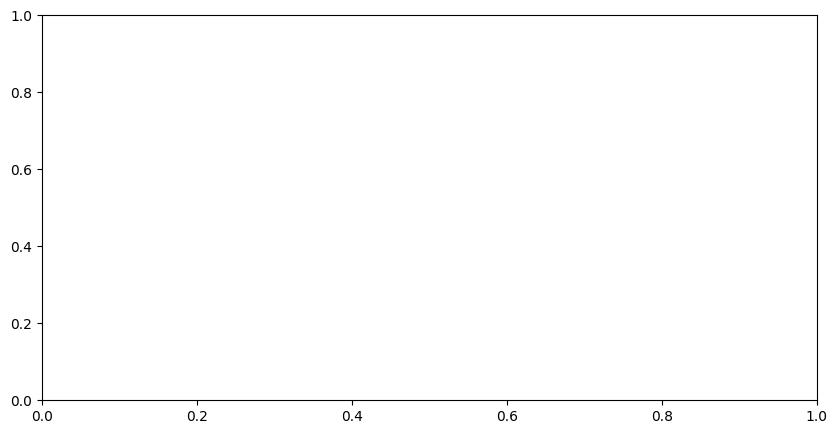

In [19]:
plt.figure()
plt.bar(filtered_waste_df['Type'], filtered_waste_df['Tonnes'])
plt.tick_params(axis='x', labelrotation=90)
plt.show()


In [ ]:
type(waste_data)

pandas.core.frame.DataFrame

# ☀️SUNBURST Chart~🌞

In [ ]:
filtered_waste_df = filtered_waste_df.dropna(subset=['Tonnes'])
fig = px.sunburst(
                filtered_waste_df, 
                path = ['Jurisdiction', 'Fate'], values= 'Tonnes', 
                height=900,
                title='Fates of Waste for each State/Territory')

fig.show()

# To Better see the smaller states...👇

In [ ]:
fig = px.sunburst(filtered_waste_df, 
                path = ['Jurisdiction', 'Fate'], 
                height=700,
                title='Top 3 Fates of Waste for each State/Territory')

fig.show()

# WOW Vic... you do more recycling than disposal!!!! Hoow did that happen over the years?

# 📈📈📈Time Graphs📈📈📈

# Q: Has your waste increased/decreased over the years, @Everyone?

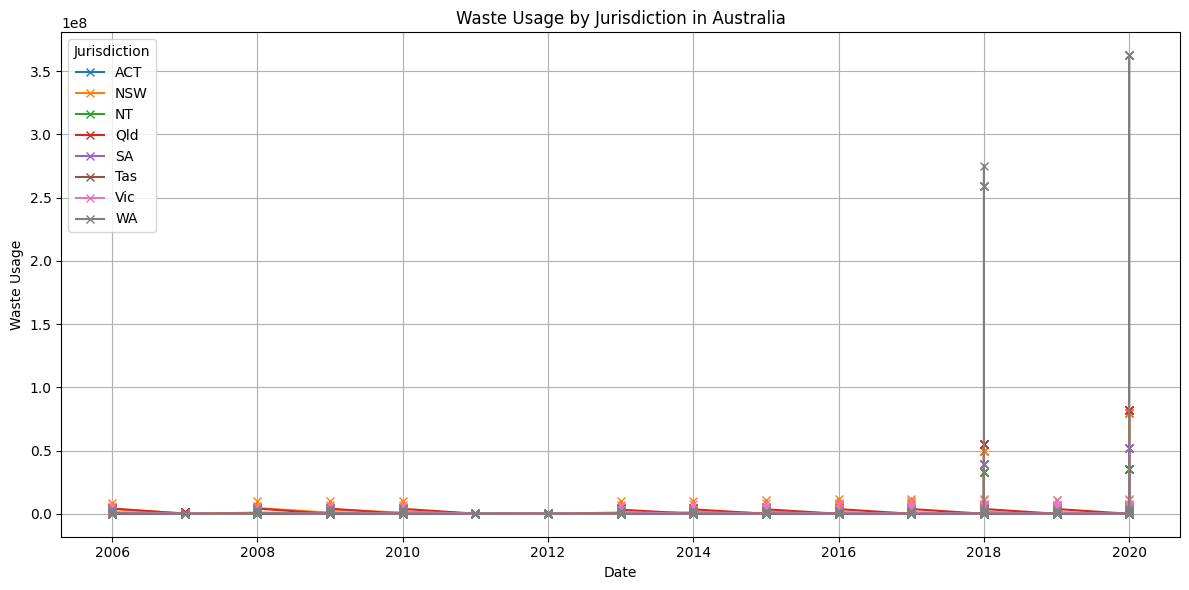

In [ ]:

df = pd.DataFrame(filtered_waste_df)
df['year_dt'] = pd.to_datetime(df['year_dt'])


plt.figure(figsize=(12, 6))

for state in df['Jurisdiction'].unique():
    state_data = df[df['Jurisdiction'] == state]
    plt.plot(state_data['year_dt'], state_data['Tonnes'], marker='x', label=state)

plt.xlabel('Date')
plt.ylabel('Waste Usage')
plt.title('Waste Usage by Jurisdiction in Australia')
plt.legend(title='Jurisdiction')
plt.grid(True)
plt.tight_layout()
plt.show()


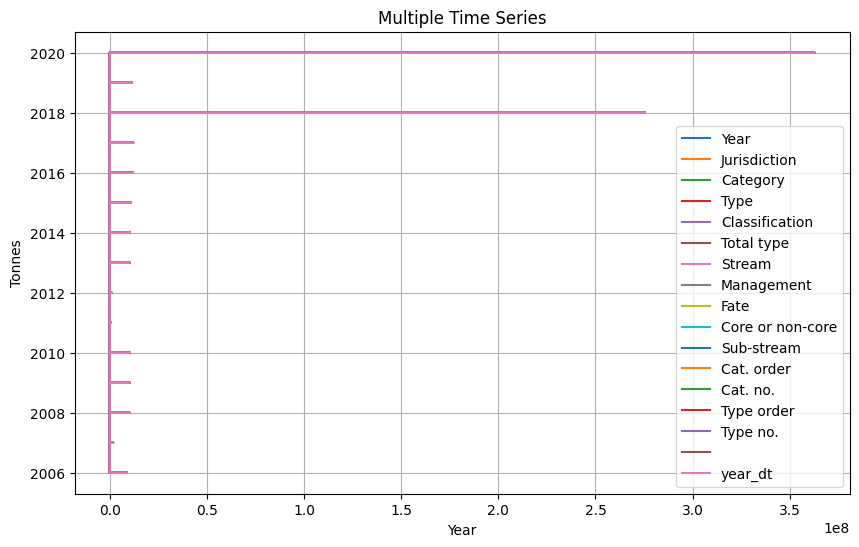

In [ ]:
df = pd.DataFrame(filtered_waste_df)
df.set_index('Tonnes', inplace=True)

plt.figure(figsize=(10, 6))

for column in df.columns:
    plt.plot(df.index, df['year_dt'], label=column)

plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.title('Multiple Time Series')
plt.legend()
plt.grid(True)
plt.show()


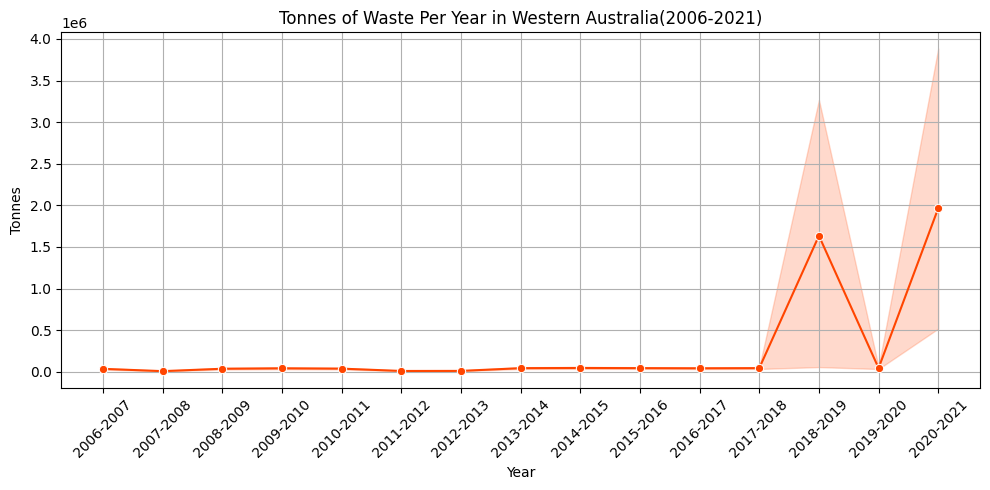

In [ ]:
df = pd.DataFrame(wa_data)
condition = ~((wa_data['Category'] == 'Total'))

wa_data = df[condition]

plt.figure()
sns.lineplot(x='Year', y='Tonnes', data=df, marker="o", color='orangered')
plt.title('Tonnes of Waste Per Year in Western Australia(2006-2021)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

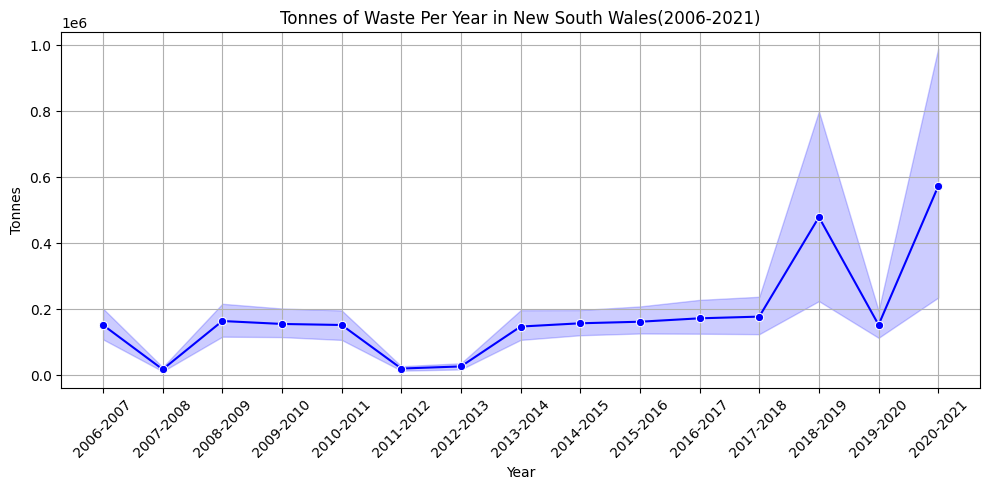

In [ ]:
df = pd.DataFrame(nsw_data)

plt.figure()
sns.lineplot(x='Year', y='Tonnes', data=df, marker="o", color='blue')
plt.title('Tonnes of Waste Per Year in New South Wales(2006-2021)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

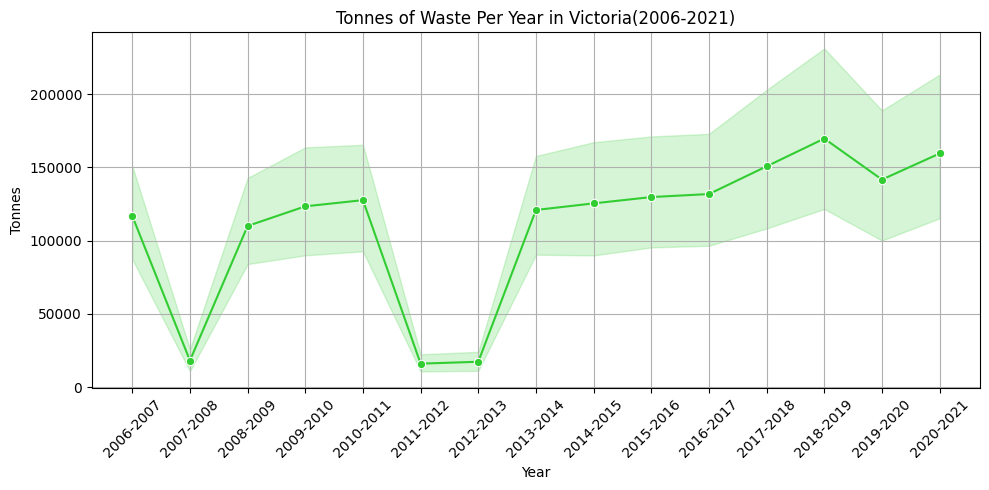

In [ ]:
df = pd.DataFrame(vic_data)

plt.figure()
sns.lineplot(x='Year', 
            y='Tonnes', 
            data=df, 
            marker="o", 
            color='limegreen'
            )

plt.title('Tonnes of Waste Per Year in Victoria(2006-2021)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# For ACT 

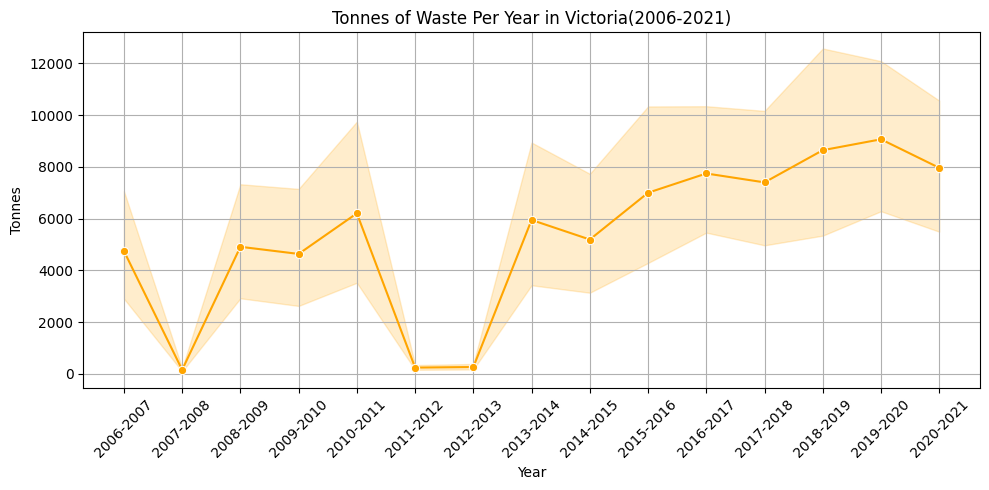

In [ ]:
df = pd.DataFrame(act_data)

plt.figure()
sns.lineplot(x='Year', 
            y='Tonnes', 
            data=df, 
            marker="o", 
            color='orange'
            )
plt.title('Tonnes of Waste Per Year in Victoria(2006-2021)')
plt.xlabel('Year')
plt.ylabel('Tonnes')
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(filtered_waste_df)

# Create the interactive time series plot
fig = px.line(
    df, 
    x='year_dt', 
    y='Tonnes', 
    color='Jurisdiction', 
    title='Waste Over Time by Australian State/Territory',
    labels={'Waste (tonnes)': 'Waste (tonnes)', 'Date': 'Date'},
    markers=True
)

# Add hover information
fig.update_traces(mode='lines+markers+text', textposition='top right', hovertemplate='State/Territory: %{legend.text}<br>Date: %{x}<br>Waste: %{y}<extra></extra>')

# Show the plot
fig.show()